# WeatherPy

## Dependencies

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress




# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Create Random Geographic Coordinates and List of Cities

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


# Requirement 1: Create Plots to Show Relationship Between Weather Variables and Latitude

## Make API requests to fill in weather data for each city

In [3]:
# Set the URL Base
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create Counters
record_count = 1
set_count = 1

In [4]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [5]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          
    except:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | saltpond
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | port-gentil
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | san carlos de bariloche
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | lidkoping
Processing Record 15 of Set 1 | bafra
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | yakeshi
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | isiro
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | mataiea
City not 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,7.19,49,100,1.34,US,1670265341
1,saltpond,5.2091,-1.0606,26.63,85,80,4.08,GH,1670265605
2,kapaa,22.0752,-159.3190,23.44,90,100,2.06,US,1670265606
3,rikitea,-23.1203,-134.9692,24.09,81,100,6.02,PF,1670265607
4,cabo san lucas,22.8909,-109.9124,30.90,60,40,2.06,MX,1670265413


In [8]:
# Export the city data frame into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.19,49,100,1.34,US,1670265341
1,saltpond,5.2091,-1.0606,26.63,85,80,4.08,GH,1670265605
2,kapaa,22.0752,-159.3190,23.44,90,100,2.06,US,1670265606
3,rikitea,-23.1203,-134.9692,24.09,81,100,6.02,PF,1670265607
4,cabo san lucas,22.8909,-109.9124,30.90,60,40,2.06,MX,1670265413


## Scatter Plots

### a. Latitude vs. Temperature

In [10]:
# Build the dataframe to store the latitudes and temperatures for each city
lat_temp_df = city_data_df.loc[:, ["Lat", "Max Temp"]]
lat_temp_df

,Lat,Max Temp
City_ID,,
0,42.6001,7.19
1,5.2091,26.63
2,22.0752,23.44
3,-23.1203,24.09
4,22.8909,30.90
...,...,...
559,54.3419,-10.44
560,43.7501,4.39
561,-24.1333,25.51


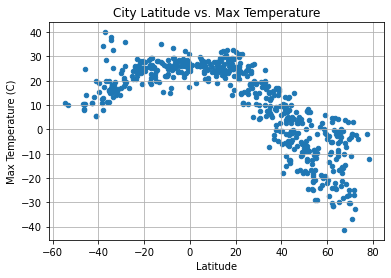

In [11]:
# Build Scatterplot
lat_temp_df.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()


In [12]:

# Save the figure
plt.savefig("output_data/Fig1.png")

<Figure size 432x288 with 0 Axes>

### b. Latitude vs. Humidity

In [13]:
# Build the dataframe to hold latitude and humidity for each city
lat_humid_df = city_data_df.loc[:,["Lat", "Humidity"]]

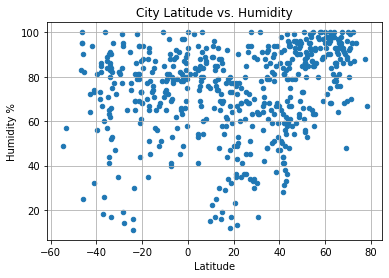

In [14]:
lat_humid_df.plot.scatter("Lat", "Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")
plt.grid()

In [15]:
# Save the figure
plt.savefig("output_data/Fig2.png")

<Figure size 432x288 with 0 Axes>

### c. Latitude vs. Cloudiness

In [16]:
# Build the dataframe to hold latitude and humidity for each city
lat_cloud_df = city_data_df.loc[:,["Lat", "Cloudiness"]]

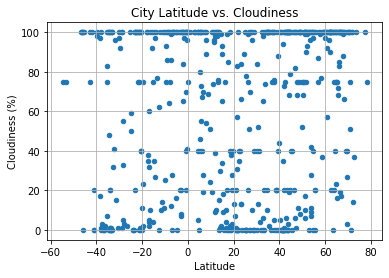

In [17]:
# Build Scatterplot
lat_cloud_df.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

In [18]:
# Save the figure
plt.savefig("output_data/Fig3.png")

<Figure size 432x288 with 0 Axes>

### d. Latitude vs. Wind Speed 

In [19]:
# Build the dataframe to hold latitude and humidity for each city
lat_wind_df = city_data_df.loc[:,["Lat", "Wind Speed"]]

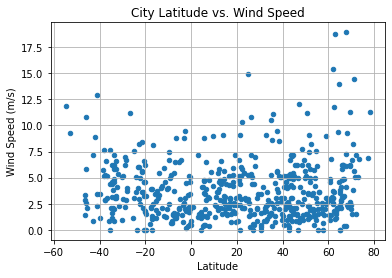

In [20]:
# Build Scatter plot
lat_wind_df.plot.scatter("Lat", "Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

In [21]:
# Save the figure
plt.savefig("output_data/Fig4.png")

<Figure size 432x288 with 0 Axes>

# Requirement 2: Compute Linear Regression for Each Relationship

## Function to create linear regression plots

In [22]:
# Write Function for Linear Regression
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = [float(slope)*x_values[i]+intercept for i in range(len(x_values))]
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       #Getting ready to write the equation on the graph

    plt.scatter(x_values,y_values)          #Create scatter plot 
    plt.plot(x_values,regress_values,"b-")      # Plotting red line
    plt.xlabel("Latitude")
    
    print(f"The r value is: {rvalue}")

    return line_eq
    


## Divide DataFrame by Hemisphere

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
N_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

N_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.19,49,100,1.34,US,1670265341
1,saltpond,5.2091,-1.0606,26.63,85,80,4.08,GH,1670265605
2,kapaa,22.0752,-159.3190,23.44,90,100,2.06,US,1670265606
4,cabo san lucas,22.8909,-109.9124,30.90,60,40,2.06,MX,1670265413
5,qaanaaq,77.4840,-69.3632,-1.85,88,100,6.88,GL,1670265608
...,...,...,...,...,...,...,...,...,...
556,ginda,30.6945,78.4932,7.39,17,52,3.41,IN,1670265933
557,pierre,44.3683,-100.3510,-5.08,84,100,7.15,US,1670265934
558,grand-santi,4.2500,-54.3833,29.82,54,100,1.37,GF,1670265935


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
S_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

S_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rikitea,-23.1203,-134.9692,24.09,81,100,6.02,PF,1670265607
6,port-gentil,-0.7193,8.7815,27.98,83,40,4.63,GA,1670265609
7,port alfred,-33.5906,26.8910,15.66,90,0,0.89,ZA,1670265610
8,san carlos de bariloche,-41.1456,-71.3082,19.86,32,20,12.86,AR,1670265491
13,puerto ayora,-0.7393,-90.3518,26.98,86,70,2.24,EC,1670265613
...,...,...,...,...,...,...,...,...,...
550,talara,-4.5772,-81.2719,28.42,57,0,6.69,PE,1670265930
551,nosy varika,-20.5833,48.5333,23.92,87,100,3.21,MG,1670265931
561,aranos,-24.1333,19.1167,25.51,11,0,3.59,NaN,1670265937


## Scatterplots

### a. Northern Hemisphere: Temperature vs. Latitude

The r value is: -0.8594039470825124


Text(0, -30, 'y = -0.75x + 34.89')

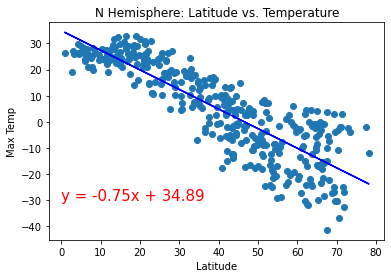

In [33]:
regress_a = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Max Temp"]))
plt.ylabel("Max Temp")
plt.title("N Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_a,(0,-30),fontsize=15,color="red") # Graphing the equation on the plot 


### b. Southern Hemisphere: Temperature vs. Latitude

The r value is: 0.5955823477863598


Text(-30, 10, 'y = 0.28x + 28.22')

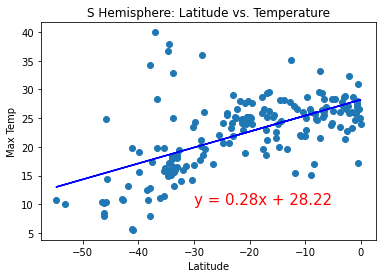

In [34]:
regress_b = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Max Temp"]))
plt.ylabel("Max Temp")
plt.title("S Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_b,(-30,10),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Temperature and Latitude

blah blah blah

### c. Norther Hemisphere: Humidity vs. Latitude

The r value is: 0.39033368450426026


Text(40, 20, 'y = 0.41x + 58.47')

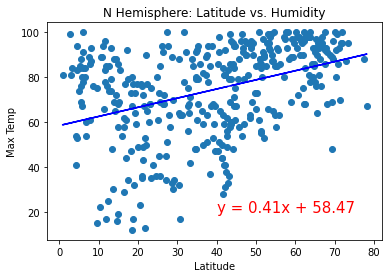

In [35]:
regress_c = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Humidity"]))
plt.ylabel("Max Temp")
plt.title("N Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_c,(40,20),fontsize=15,color="red") # Graphing the equation on the plot 

### d. Southern Hemisphere: Humidity vs. Latitude

The r value is: 0.12265855856956207


Text(-25, 20, 'y = 0.17x + 75.89')

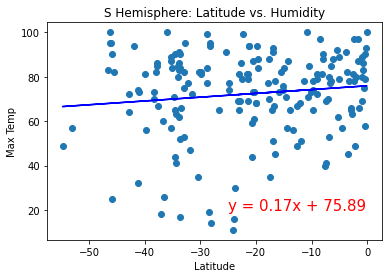

In [39]:
regress_d = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Humidity"]))
plt.ylabel("Max Temp")
plt.title("S Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_d,(-25,20),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Humidity and Latitude

blah blah blah

### e. Northern Hemisphere: Cloudiness vs. Latitude

The r value is: 0.22784368283267667


Text(35, 30, 'y = 0.47x + 42.13')

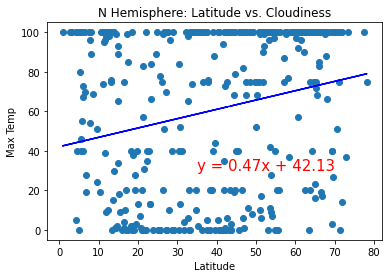

In [40]:
regress_e = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Cloudiness"]))
plt.ylabel("Max Temp")
plt.title("N Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_e,(35,30),fontsize=15,color="red") # Graphing the equation on the plot 

### f. Southern Hemisphere: Cloudiness vs. Latitude

The r value is: 0.17685422395073772


Text(-55, 55, 'y = 0.54x + 70.05')

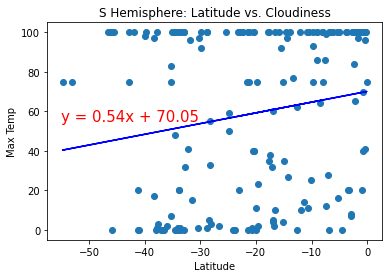

In [41]:
regress_f = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Cloudiness"]))
plt.ylabel("Max Temp")
plt.title("S Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_f,(-55,55),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Cloudiness and Latitude

blah blah blah

### g. Northern Hemisphere: Wind Speed vs. Latitude

The r value is: 0.14926428849918985


Text(10, 12.5, 'y = 0.02x + 2.86')

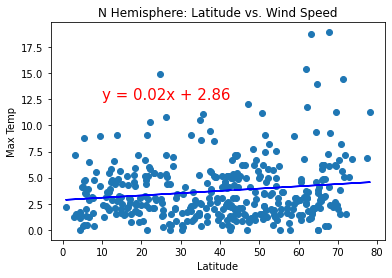

In [42]:
regress_g = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Wind Speed"]))
plt.ylabel("Max Temp")
plt.title("N Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_g,(10,12.5),fontsize=15,color="red") # Graphing the equation on the plot 

### h. Southern Hemisphere: Wind Speed vs. Latitude

The r value is: -0.29097169103055476


Text(-50, 10, 'y = -0.05x + 2.63')

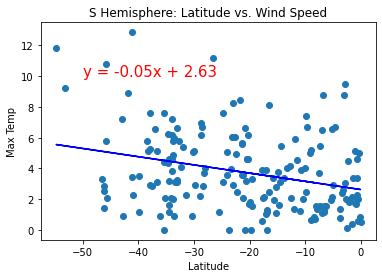

In [43]:
regress_h = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Wind Speed"]))
plt.ylabel("Max Temp")
plt.title("S Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_h,(-50,10),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Wind Speed and Latitude

blah blah blah